In [1]:

import numpy as np
# 1 1 1원을 1년 저축 100% 이자 => 원금 1원, 이자 1원 => 2원
# 복리라면 1원을 6개월씩 나누어 저축, 1+0.5, 1원에 대한 이자 0.5, 0.5 에 대한 이자 0.25
# => 2.25
# 365일 투자하고 계속 나누어서 투자한다면 1년에 최대 2.71828을 얻을 수 있다
print(np.e) #오일러 상수
print(np.exp(1)) #y=e 1 의 승
print(np.exp(2)) #y=e 2 의 승

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

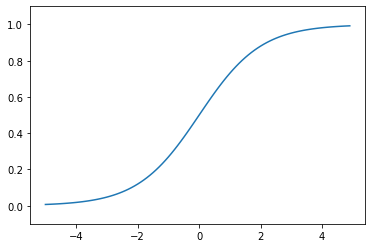

In [2]:
# 로지스틱 함수는 시그모이드 함수의 일종 : s자 모양의 함수
# 0.0~1.0 사이의 실수값
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)

In [3]:
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# random_state : 난수 발생 시드

In [4]:
from sklearn.datasets import make_classification
import statsmodels.api as sm
# 분류용 랜덤데이터셋
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
logit_mod = sm.Logit(y, X) 
logit_res = logit_mod.fit()
print(logit_res.summary())
# Pseudo R-squ.이 1에 가까울수록 분류가 잘된 모델

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 24 May 2022   Pseudo R-squ.:                  0.7658
Time:                        16:05:06   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919


In [6]:
# 예측값은 0.0~1.0 사이의 실수값
result=logit_res.predict(X)[:5]
print(result)
# 0.5 이상이면 1, 미만이면 0으로 분류함
for a in result:
    print(int(round(a)),end=' ')

[0.08580852 0.99949403 0.00370571 0.99933961 0.30472943]
0 1 0 1 0 

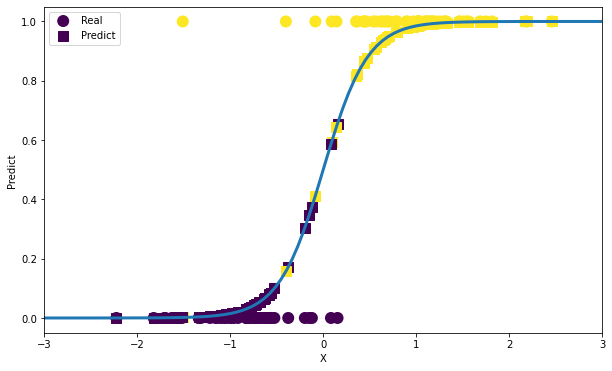

In [12]:
xx = np.linspace(-3, 3, 100)
pred = logit_res.predict(xx) # 모형이 예측한 값
plt.figure(figsize=(10,6))
plt.plot(xx, pred, lw=3) # lw: line width
plt.scatter(X, y, c=y, s=100, lw=2, label='Real') # 실제값
plt.scatter(X, logit_res.predict(X), label='Predict', marker='s', c=y, s=100, lw=1)
plt.xlim(-3, 3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend()
plt.show()

In [9]:
# 로지스틱 회귀 모형의 성능 측정
# log_loss() 로그 손실값 (분류 모형의 성능을 평가할 때 사용하는 값)
# 100%의 확률로 답을 구한 경우 : -log(1.0)=0 
# 80% 확률 -log(0.8)=0.22314 
# 60% 확률 -log(0.6)=0.51082 
# 확률이 낮아질수록 log loss는 크게 증가한다 (확률이 낮을 때 더 많은 패널티를 부여)
from sklearn.metrics import log_loss
y_hat = logit_res.predict(X)
# normalize 정규화 여부
log_loss(y, y_hat, normalize=False)

16.226122466352443

In [10]:
# 실제 y값의 평균
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [11]:
# y 리스트와 같은 사이즈로 값을 1로 초기화한 리스트
np.ones_like(y)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# 실제 y값의 평균으로 계산한 로그 손실값
y_null = np.ones_like(y) * mu_null
print(y_null)
log_loss(y, y_null, normalize=False)

[0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51]


69.29471672244784

In [14]:
# 결정계수값 (Pseudo R-squ.)
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7658389667520492

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, stratify=y, random_state=0)


In [16]:
# 사이킷런 패키지의 LogisticRegression() 함수
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)



LogisticRegression(random_state=0)

In [17]:
print(model.classes_) #출력값
print(model.intercept_) #절편
print(model.coef_) #회귀계수

[0 1]
[0.01210487]
[[2.99972644]]


In [18]:
# 0일 확률, 1일 확률
model.predict_proba(X_test)


array([[0.00935192, 0.99064808],
       [0.00428094, 0.99571906],
       [0.98204208, 0.01795792],
       [0.11773589, 0.88226411],
       [0.10564409, 0.89435591],
       [0.94862134, 0.05137866],
       [0.9892088 , 0.0107912 ],
       [0.13379119, 0.86620881],
       [0.00138017, 0.99861983],
       [0.84331206, 0.15668794],
       [0.8996786 , 0.1003214 ],
       [0.94798802, 0.05201198],
       [0.91098884, 0.08901116],
       [0.25466241, 0.74533759],
       [0.04540992, 0.95459008],
       [0.96422105, 0.03577895],
       [0.99385324, 0.00614676],
       [0.88332811, 0.11667189],
       [0.85162766, 0.14837234],
       [0.03287681, 0.96712319]])

In [19]:
model.predict(X_test)


array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [20]:
model.score(X_test, y_test) # 분류 정확도


0.95

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

In [2]:
import statsmodels.api as sm
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()
#Acceptance: 합격여부

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


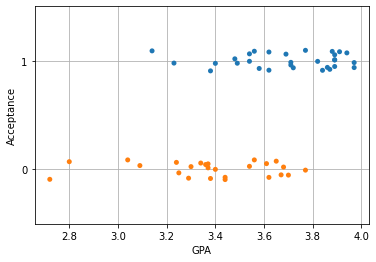

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# 학점과 합격여부의 상관관계
# jitter=True(데이터의 수가 많을 경우 겹치지 않도록 하는 옵션)
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [5]:
# MCAT = VR + PS + WS + BS이므로 MCAT는 독립변수에서 제외
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Wed, 25 May 2022   Pseudo R-squ.:                  0.5913
Time:                        09:42:02   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.